In [1]:
from __future__ import print_function

import tensorflow as tf

import optimizers
import util

LR = 1e-1
N_STEPS = 5000
REPORT_STEPS = 100
RAND_SEED = 100


In [2]:
class Toy_model():
    def __init__(self, name, seed=None):
        self.name = name
        with tf.name_scope('Toy_model'):
            self.a = tf.placeholder(tf.float32)
            self.x = tf.Variable(tf.random_uniform([1], minval=-1., 
                                                   maxval=1., seed=seed))
            self.loss = self.a * self.x

In [3]:
n_models = 2
names = ['ADAM', 'AMS']
models = [Toy_model(names[m], RAND_SEED) for m in range(n_models)]
train_steps = [tf.train.AdamOptimizer(LR).minimize(models[0].loss),
               optimizers.AMSGrad(LR).minimize(models[1].loss)]
#You can also try optimizers.Adam(LR)

x_vals = [[] for m in range(n_models)]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(N_STEPS):
        a_val = 1010 if step % 101 == 1 else -10
        for m in range(n_models):
            sess.run(train_steps[m], feed_dict={models[m].a: a_val})
            if step % REPORT_STEPS == 0:
                x_val = sess.run(models[m].x, feed_dict={models[m].a: a_val})
                print('step %d, %s, x: %.3g' % (step, models[m].name, x_val))
                x_vals[m].append(x_val[0])


step 0, ADAM, x: 1.02
step 0, AMS, x: 1.02
step 100, ADAM, x: 1.14
step 100, AMS, x: 1.13
step 200, ADAM, x: 1.26
step 200, AMS, x: 1.22
step 300, ADAM, x: 1.33
step 300, AMS, x: 1.27
step 400, ADAM, x: 1.37
step 400, AMS, x: 1.3
step 500, ADAM, x: 1.41
step 500, AMS, x: 1.32
step 600, ADAM, x: 1.43
step 600, AMS, x: 1.32
step 700, ADAM, x: 1.45
step 700, AMS, x: 1.33
step 800, ADAM, x: 1.47
step 800, AMS, x: 1.32
step 900, ADAM, x: 1.49
step 900, AMS, x: 1.32
step 1000, ADAM, x: 1.5
step 1000, AMS, x: 1.31
step 1100, ADAM, x: 1.51
step 1100, AMS, x: 1.31
step 1200, ADAM, x: 1.52
step 1200, AMS, x: 1.3
step 1300, ADAM, x: 1.53
step 1300, AMS, x: 1.28
step 1400, ADAM, x: 1.54
step 1400, AMS, x: 1.27
step 1500, ADAM, x: 1.54
step 1500, AMS, x: 1.26
step 1600, ADAM, x: 1.55
step 1600, AMS, x: 1.24
step 1700, ADAM, x: 1.55
step 1700, AMS, x: 1.23
step 1800, ADAM, x: 1.56
step 1800, AMS, x: 1.22
step 1900, ADAM, x: 1.56
step 1900, AMS, x: 1.2
step 2000, ADAM, x: 1.57
step 2000, AMS, x: 1.18

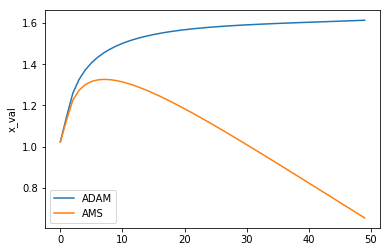

In [4]:
util.plot_results(x_vals, names, 'x_val')